In [1]:
import pandas as pd
import seaborn as sns

import spacy

In [2]:
from tqdm import tqdm

In [3]:
from ast import literal_eval

In [4]:
from collections import Counter

In [5]:
tqdm.pandas()

# EDA for remaning variables

In [6]:
tcc = pd.read_csv("data/MUSIC4ALL/processed/tcc_music4all.csv", index_col=0)

In [7]:
tcc.head()

,lyrics,artist,song,album_name,genres,spotify_id,popularity,danceability,energy,key,...,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,time_signature,explicit,nb_genres,year
12,"De tanto me perder, de andar sem sono\nPor ess...",Adriana Calcanhotto,Um Dia Desses,Maré,['mpb'],30Iofj66ashW2QYbROuIC2,24,0.724,0.339,0,...,151013,0.86800,0.000001,0.1130,-12.043,0.0333,4,0,1,2008
16,No meio dessa confusão\nCê me deixou na mão\nC...,UM44K,Nossa música,Nossa música,"['pop', 'rap']",4hpcc2wq84pilUgDbIPkDN,53,0.592,0.387,2,...,239643,0.85300,0.000000,0.1070,-9.567,0.0407,4,0,2,2018
18,Radio bemba 00.0 Super Sónica\nAtento\nO bixo ...,Manu Chao,Bixo,Próxima Estación: Esperanza,"['latin', 'reggae', 'world']",3JJIdDXjN8oH6ZfPv3pApB,42,0.658,0.452,5,...,112040,0.76200,0.000000,0.5060,-9.929,0.1530,4,0,3,2001
19,Gostei da sua ideia\nEntrei na sua selva\nVocê...,Selvagens à Procura de Lei,Enquanto Eu Passar Na Sua Rua,Selvagens à Procura de Lei,"['indie rock', 'rock']",0BMowyr7gejwveFKRkhj0l,44,0.526,0.771,6,...,203987,0.12800,0.000006,0.1670,-5.507,0.0325,4,0,2,2013
47,"Já tive mulheres (salve Martinho), de todos os...",Motirô,Senhorita,Um Passo à Frente,['hip hop'],5se489TZrnQLUXZq8vARkY,13,0.844,0.591,11,...,255987,0.00618,0.000000,0.0262,-5.830,0.3000,4,0,1,2006


In [8]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 12 to 109242
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lyrics            6513 non-null   object 
 1   artist            6513 non-null   object 
 2   song              6513 non-null   object 
 3   album_name        6513 non-null   object 
 4   genres            6513 non-null   object 
 5   spotify_id        6513 non-null   object 
 6   popularity        6513 non-null   int64  
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   key               6513 non-null   int64  
 10  mode              6513 non-null   int64  
 11  valence           6513 non-null   float64
 12  tempo             6513 non-null   float64
 13  duration_ms       6513 non-null   int64  
 14  acousticness      6513 non-null   float64
 15  instrumentalness  6513 non-null   float64
 16  liveness          6513 non-null   float

In [9]:
tcc.genres = tcc.genres.progress_apply(literal_eval)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6513/6513 [00:00<00:00, 46064.59it/s]


In [10]:
tcc.describe(include=['O'])

,lyrics,artist,song,album_name,genres,spotify_id
count,6513,6513,6513,6513,6513,6513
unique,6513,1052,6265,2858,1525,6513
top,Sempre alguém me desperta ciúme e desejo\nMas ...,Chico Buarque,Volta,Ao Vivo,[mpb],63Gm8YhzwvsVQ4Cjh3LnkQ
freq,1,102,6,26,655,1


In [12]:
tcc["explicit_cat"] = tcc.explicit.astype("category")

In [13]:
sns.set_theme(style="white", palette='Set2')

# Artist

In [13]:
tcc.artist = tcc.artist.str.strip().str.lower()

In [14]:
len(tcc.artist.unique())

1052

In [15]:
artist_count = tcc.artist.value_counts()
artist_count

chico buarque        102
gal costa             87
legião urbana         72
elis regina           71
gilberto gil          69
                    ... 
velho                  1
diomedes chinaski      1
bellini                1
janeiro                1
gangrena gasosa        1
Name: artist, Length: 1052, dtype: int64

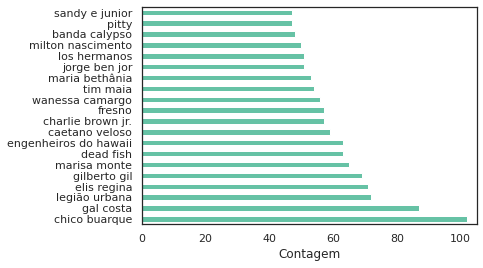

In [16]:
top20_artist = artist_count[:20]
fig = top20_artist.plot(kind='barh');
fig.set(xlim=(0, 105), xlabel="Contagem")
fig.get_figure().savefig('results/contagem_top_artist.png', dpi=300, bbox_inches='tight')

In [17]:
bottom20_artist = artist_count[-20:]
bottom20_artist

mc menor mr             1
morada                  1
mc rodolfinho           1
lorena chaves           1
los hermanos rosario    1
márcio greyck           1
hot play                1
patricia marx           1
ara ketu                1
ana malhoa              1
lauriete                1
francinne               1
john wayne              1
mia badgyal             1
café preto              1
velho                   1
diomedes chinaski       1
bellini                 1
janeiro                 1
gangrena gasosa         1
Name: artist, dtype: int64

In [18]:
unique_explicit_artist = tcc[tcc.explicit==1].artist.drop_duplicates().to_frame()
unique_explicit_artist["explicit_cat"] = "1"
unique_non_explicit_artist = tcc[tcc.explicit==0].artist.drop_duplicates().to_frame()
unique_non_explicit_artist["explicit_cat"] = "0"

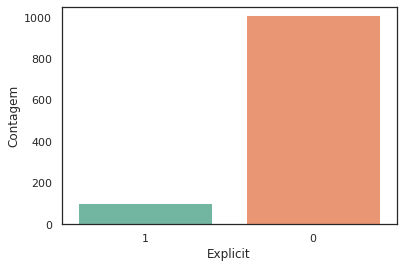

In [19]:
unique_artist_count = pd.concat([unique_explicit_artist, unique_non_explicit_artist])
fig = sns.countplot(x="explicit_cat", data=unique_artist_count);
fig.set(ylim=(0,1050), xlabel="Explicit", ylabel="Contagem")
fig.get_figure().savefig('results/contagem_artist_explicit.png', dpi=300, bbox_inches='tight')

In [22]:
unique_artist_count.groupby("explicit_cat").size()

explicit_cat
0    1010
1     101
dtype: int64

In [23]:
len(unique_artist_count[unique_artist_count.artist.duplicated()].artist)

59

# Album Name

In [24]:
tcc.album_name = tcc.album_name.str.strip().str.lower()

In [25]:
album_count = tcc.groupby(["artist", "album_name"]).size().sort_values()

In [44]:
len(album_count)

2964

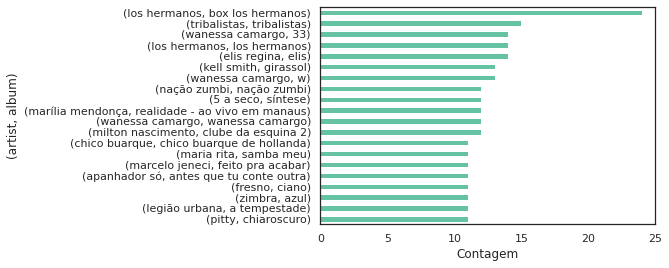

In [28]:
top20_album = album_count[-20:]
fig = top20_album.plot(kind='barh');
fig.set(xlim=(0, 25), xlabel="Contagem", ylabel="(artist, album)")
fig.get_figure().savefig('results/contagem_top_album.png', dpi=300, bbox_inches='tight')

In [38]:
unique_explicit_album = tcc[tcc.explicit==1].drop_duplicates(subset=["artist", "album_name"])
unique_explicit_album["explicit_cat"] = "1"
unique_non_explicit_album = tcc[tcc.explicit==0].drop_duplicates(subset=["artist", "album_name"])
unique_non_explicit_album["explicit_cat"] = "0"

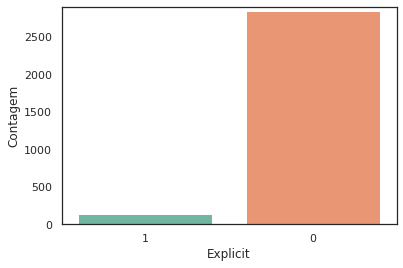

In [45]:
unique_album_count = pd.concat([unique_explicit_album, unique_non_explicit_album])[["artist", "album_name", "explicit_cat"]]
fig = sns.countplot(x="explicit_cat", data=unique_album_count);
fig.set(ylim=(0,2900), xlabel="Explicit", ylabel="Contagem")
fig.get_figure().savefig('results/contagem_album_explicit.png', dpi=300, bbox_inches='tight')

In [46]:
unique_album_count.groupby("explicit_cat").size()

explicit_cat
0    2840
1     141
dtype: int64

In [33]:
len(unique_album_count.drop(columns="explicit_cat")[unique_album_count.duplicated()])

0

# Song

In [47]:
nlp = spacy.load('pt_core_news_md')
nlp.Defaults.stop_words |= {'pra', 'pro'}

In [48]:
def get_lemmas(text):
    return [i.lemma_ for i in nlp(text.lower()) if not i.is_stop and i.is_alpha]

In [49]:
tcc["song_lemmas"] = tcc.song.progress_apply(get_lemmas)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6513/6513 [00:30<00:00, 211.02it/s]


In [50]:
tcc["song_nb_words"] = tcc.song_lemmas.apply(len)

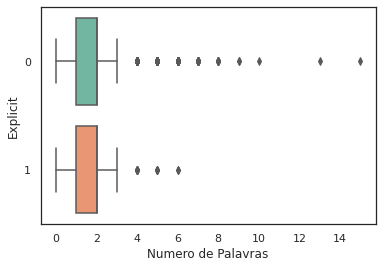

In [51]:
fig = sns.boxplot(x="song_nb_words", y="explicit_cat", data=tcc);
fig.set(xlabel='Numero de Palavras', ylabel='Explicit')
fig.get_figure().savefig('results/contagem_song_words_explicit.png', dpi=300, bbox_inches='tight')

In [52]:
vocab = []
vocab_explicit = []
vocab_non_explicit= []

for i, row in tqdm(tcc.iterrows()):

    if row.explicit_cat == 0:
        vocab_non_explicit.extend(row.song_lemmas)
    else:
        vocab_explicit.extend(row.song_lemmas)
        
    vocab.extend(row.song_lemmas)

6513it [00:00, 10477.20it/s]


In [53]:
len(set(vocab))

4124

In [54]:
len(set(vocab_explicit))

289

In [55]:
len(set(vocab_non_explicit))

3989

In [56]:
vocab_count = pd.DataFrame(columns=["explicit_cat", "vocab"], data=[[1, len(set(vocab_explicit))],
                                                                    [0, len(set(vocab_non_explicit))]])
vocab_count

,explicit_cat,vocab
0,1,289
1,0,3989


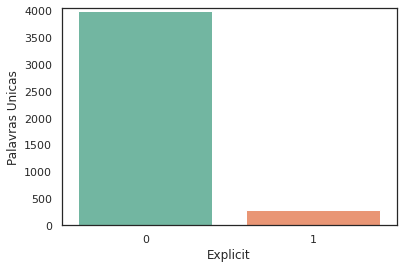

In [57]:
fig = sns.barplot(x="explicit_cat", y="vocab", data=vocab_count);
fig.set(ylim=(0,4050), xlabel="Explicit", ylabel="Palavras Unicas")
fig.get_figure().savefig('results/contagem_song_vocab_explicit.png', dpi=300, bbox_inches='tight')

In [58]:
explicit_song_count = Counter(vocab_explicit)
non_explicit_song_count = Counter(vocab_non_explicit)

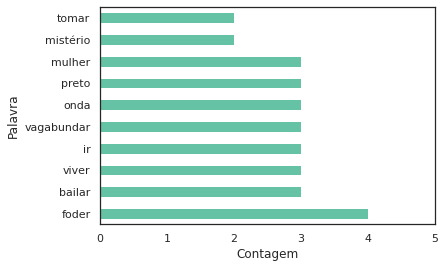

In [59]:
most_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=explicit_song_count.most_common(10))
most_explicit = most_explicit.set_index("palavra")
fig = most_explicit.plot(kind='barh');
fig.set(xlim=(0, 5), xlabel="Contagem", ylabel="Palavra")
fig.legend().set_visible(False)
fig.get_figure().savefig('results/song_top_palavra_explicit.png', dpi=300, bbox_inches='tight')

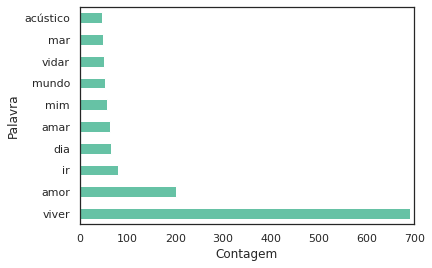

In [60]:
most_non_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=non_explicit_song_count.most_common(10))
most_non_explicit = most_non_explicit.set_index("palavra")
fig = most_non_explicit.plot(kind='barh');
fig.set(xlim=(0, 700), xlabel="Contagem", ylabel="Palavra")
fig.legend().set_visible(False)
fig.get_figure().savefig('results/song_top_palavra_non_explicit.png', dpi=300, bbox_inches='tight')

# Lyrics

In [61]:
tcc["lyrics_lemmas"] = tcc.lyrics.progress_apply(get_lemmas)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6513/6513 [03:04<00:00, 35.38it/s]


In [62]:
tcc["lyrics_nb_words"] = tcc.lyrics_lemmas.apply(len)

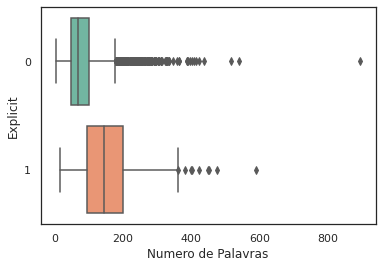

In [63]:
fig = sns.boxplot(x="lyrics_nb_words", y="explicit_cat", data=tcc);
fig.set(xlabel='Numero de Palavras', ylabel='Explicit')
fig.get_figure().savefig('results/contagem_lyrics_words_explicit.png', dpi=300, bbox_inches='tight')

In [64]:
vocab = []
vocab_explicit = []
vocab_non_explicit= []

for i, row in tqdm(tcc.iterrows()):

    if row.explicit_cat == 0:
        vocab_non_explicit.extend(row.lyrics_lemmas)
    else:
        vocab_explicit.extend(row.lyrics_lemmas)
        
    vocab.extend(row.lyrics_lemmas)

6513it [00:00, 9561.19it/s] 


In [65]:
len(set(vocab))

21266

In [66]:
len(set(vocab_explicit))

5565

In [67]:
len(set(vocab_non_explicit))

20027

In [68]:
vocab_count = pd.DataFrame(columns=["explicit_cat", "vocab"], data=[[1, len(set(vocab_explicit))],
                                                                    [0, len(set(vocab_non_explicit))]])
vocab_count

,explicit_cat,vocab
0,1,5565
1,0,20027


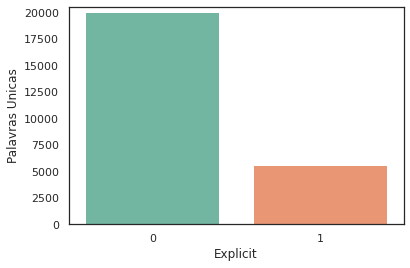

In [69]:
fig = sns.barplot(x="explicit_cat", y="vocab", data=vocab_count);
fig.set(ylim=(0,20500), xlabel="Explicit", ylabel="Palavras Unicas")
fig.get_figure().savefig('results/contagem_lyrics_vocab_explicit.png', dpi=300, bbox_inches='tight')

In [70]:
explicit_song_count = Counter(vocab_explicit)
non_explicit_song_count = Counter(vocab_non_explicit)

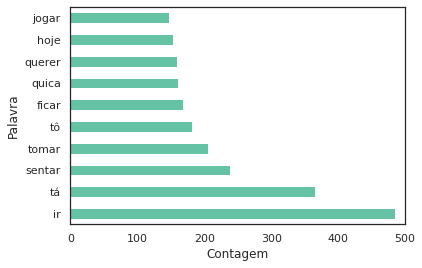

In [71]:
most_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=explicit_song_count.most_common(10))
most_explicit = most_explicit.set_index("palavra")
fig = most_explicit.plot(kind='barh');
fig.set(xlim=(0, 500), xlabel="Contagem", ylabel="Palavra")
fig.legend().set_visible(False)
fig.get_figure().savefig('results/lyrics_top_palavra_explicit.png', dpi=300, bbox_inches='tight')

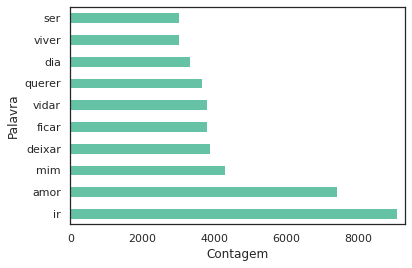

In [72]:
most_non_explicit = pd.DataFrame(columns=["palavra", "contagem"], data=non_explicit_song_count.most_common(10))
most_non_explicit = most_non_explicit.set_index("palavra")
fig = most_non_explicit.plot(kind='barh');
fig.set(xlim=(0, 9300), xlabel="Contagem", ylabel="Palavra")
fig.legend().set_visible(False)
fig.get_figure().savefig('results/lyrics_top_palavra_non_explicit.png', dpi=300, bbox_inches='tight')

# Genres

In [14]:
genres = []
genres_explicit = []
genres_non_explicit= []

for i, row in tqdm(tcc.iterrows()):

    if row.explicit_cat == 0:
        genres_non_explicit.extend(row.genres)
    else:
        genres_explicit.extend(row.genres)
        
    genres.extend(row.genres)

6513it [00:00, 10394.06it/s]


In [19]:
len(set(genres))

242

In [20]:
len(set(genres_explicit))

49

In [21]:
len(set(genres_non_explicit))

239

In [22]:
genres_count = pd.DataFrame(columns=["explicit_cat", "genres"], data=[[1, len(set(genres_explicit))],
                                                                    [0, len(set(genres_non_explicit))]])
genres_count

,explicit_cat,genres
0,1,49
1,0,239


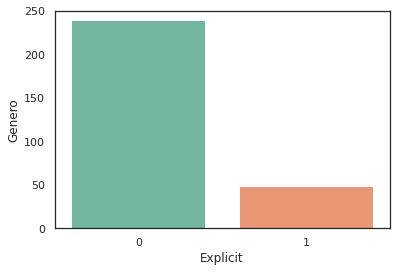

In [23]:
fig = sns.barplot(x="explicit_cat", y="genres", data=genres_count);
fig.set(ylim=(0,250), xlabel="Explicit", ylabel="Genero")
fig.get_figure().savefig('results/contagem_genres_explicit.png', dpi=300, bbox_inches='tight')

In [24]:
explicit_genre_count = Counter(genres_explicit)
non_explicit_genre_count = Counter(genres_non_explicit)

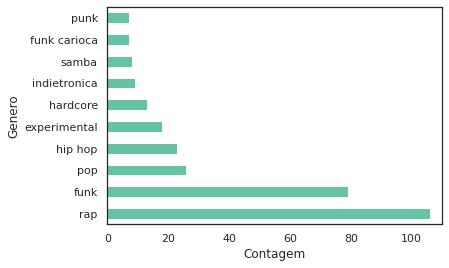

In [25]:
most_explicit = pd.DataFrame(columns=["genero", "contagem"], data=explicit_genre_count.most_common(10))
most_explicit = most_explicit.set_index("genero")
fig = most_explicit.plot(kind='barh');
fig.set(xlim=(0, 110), xlabel="Contagem", ylabel="Genero")
fig.legend().set_visible(False)
fig.get_figure().savefig('results/top_genero_explicit.png', dpi=300, bbox_inches='tight')

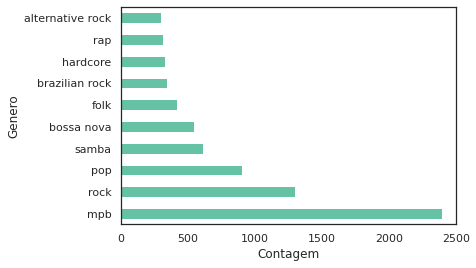

In [26]:
most_non_explicit = pd.DataFrame(columns=["genero", "contagem"], data=non_explicit_genre_count.most_common(10))
most_non_explicit = most_non_explicit.set_index("genero")
fig = most_non_explicit.plot(kind='barh');
fig.set(xlim=(0, 2500), xlabel="Contagem", ylabel="Genero")
fig.legend().set_visible(False)
fig.get_figure().savefig('results/top_palavra_non_explicit.png', dpi=300, bbox_inches='tight')

In [29]:
len(set(genres_explicit).intersection(genres_non_explicit))

46

# Explicit (Target)

In [10]:
tcc.groupby("explicit").size()

explicit
0    6322
1     191
dtype: int64

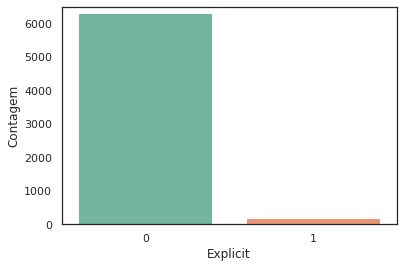

In [82]:
fig = sns.countplot(x='explicit_cat', data=tcc);
fig.set(ylim=(0,6500), xlabel="Explicit", ylabel="Contagem")
fig.get_figure().savefig('results/contagem_explicit.png', dpi=300, bbox_inches='tight')

In [83]:
explicit_years = tcc.sort_values('year')[['explicit_cat', 'year']]
explicit_years_agg = explicit_years.groupby(["year", "explicit_cat"]).size()
explicit_years_agg = explicit_years_agg.reset_index()
explicit_years_agg.columns = ['year', 'explicit_cat', 'count']
explicit_years_agg

,year,explicit_cat,count
0,1957,0,2
1,1957,1,0
2,1958,0,1
3,1958,1,0
4,1963,0,7
...,...,...,...
119,2020,1,0
120,2021,0,2
121,2021,1,0
122,2022,0,4


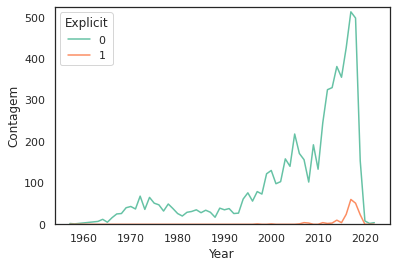

In [84]:
fig = sns.lineplot(x='year', y='count', hue='explicit_cat', data=explicit_years_agg);
fig.set(ylim=(0,525), xlabel="Year", ylabel="Contagem")
fig.legend_.set_title("Explicit")
fig.get_figure().savefig('results/contagem_explicit_year.png', dpi=300, bbox_inches='tight')

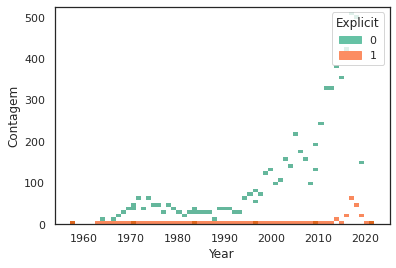

In [104]:
fig = sns.histplot(x='year', y='count', hue='explicit_cat', data=explicit_years_agg, bins=60);
fig.set(ylim=(0,525), xlabel="Year", ylabel="Contagem")
fig.legend_.set_title("Explicit")
fig.get_figure().savefig('results/contagem_explicit_year_hist.png', dpi=300)

In [106]:
tcc[tcc.explicit==1].year.unique()

array([2015, 2017, 2018, 2011, 2007, 2014, 2016, 2019, 2012, 2008, 2013,
       1997, 2000, 2006])

In [111]:
max(tcc[tcc.explicit==1].year.unique())

2019

In [110]:
min(tcc[tcc.explicit==1].year.unique())

1997

In [107]:
tcc[tcc.explicit==0].year.unique()

array([2008, 2018, 2001, 2013, 2006, 2017, 2012, 2004, 1988, 2016, 2010,
       1995, 2015, 1976, 2009, 2014, 1979, 1993, 2005, 1994, 2000, 2011,
       1968, 2002, 1986, 2003, 1984, 1998, 1969, 1999, 1972, 1991, 2019,
       1965, 2007, 1985, 1964, 1973, 1997, 1971, 1966, 1983, 1970, 1987,
       1990, 1978, 1982, 1992, 1996, 2020, 1975, 1974, 1981, 1977, 1989,
       1980, 2022, 1967, 2021, 1957, 1963, 1958])

In [108]:
max(tcc[tcc.explicit==0].year.unique())

2022

In [109]:
min(tcc[tcc.explicit==0].year.unique())

1957